# Text from candide by Voltaire

📝 import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re
import string
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import html as ihtml
from PIL import Image

[Source The Project Gutenberg](https://www.gutenberg.org/cache/epub/19942/pg19942-images.html)

In [19]:
# get URL
page = requests.get("https://www.gutenberg.org/cache/epub/19942/pg19942-images.html")
 
# scrape webpage
soup = BeautifulSoup(page.content, 'html.parser')
 
# display scrapped data
soup.prettify()

📝 Clean the HTML text

In [3]:
#delete the footnotes, bbox, pagenumber, content table, header2
list_1 = [soup.find_all("div", {'class':'footnote'}), soup.find_all("div", {'class':'bbox'}),
          soup.find_all("span",class_="pagenum"), soup.find_all('h2'), soup.find_all("div", "center")]
for i in range(0, len(list_1)):
    for div in list_1[i]:
        div.decompose()

In [4]:
#delete some sections
soup.find('section', id="pg-header").clear()
soup.find('section', id="pg-footer").clear()
soup.find("div", "blockquot").clear()
soup.find('head').clear()

In [5]:
def clean_text(text):
    text = BeautifulSoup(ihtml.unescape(text)).text
    text = re.sub(r"http[s]?://\S+", "", text)
    text = re.sub(r"\s+", " ", text)
    return text

In [6]:
text = soup.get_text()

In [7]:
text = clean_text(text)

📝 Function to tokenize and clean the text

In [8]:
def tokenize_word_text(text):
    #The word_tokenize() function will break our text phrases into individual words.
    tokens = word_tokenize(text)
    # put all words in lower case
    lower_text = [x.lower() for x in tokens]
    #remove the numbers
    no_integers = [x for x in lower_text if not (x.isdigit() 
                                         or x[0] == '-' and x[1:].isdigit())]
    #We initialize the stopwords variable, which is a list of common english words
    stop_words = stopwords.words('english')
    # list of unnecessary punctuations and words that I determined
    no_punct = ["''", "``", "said", "'s"]

    #We create a list comprehension that only returns a list of words that are NOT IN stop_words and NOT IN punctuations.
    keywords = [word for word in no_integers if not word in stop_words and not word in string.punctuation and not word in no_punct]
    return keywords

In [9]:
tokenized_text =tokenize_word_text(text)

📝 Create a dictionnary and convert it into a dataframe

In [10]:
dict_tok_text = Counter(tokenized_text)
df_candide= pd.DataFrame.from_dict(dict_tok_text, orient='index').reset_index().rename(columns={"index":"word", 0:"count"}).sort_values(by="count", ascending=False)

In [11]:
df_candide.head()

,word,count
5,candide,385
500,cunegonde,129
200,one,128
310,two,113
69,martin,111


In [12]:
df_candide.describe()

,count
count,4594.000000
mean,3.448193
std,9.079806
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,385.000000


📝 Count the total number of words

In [13]:
# word count
df_candide["count"].sum()

15841

📝 To display the data in a wordcloud, I use a mask which is a square

In [14]:
# create a square with numpy
x, y = np.ogrid[:1000, :1000]
h = 500
k = 500
mask = abs((x-h)/np.sqrt(60)+(y-k)/np.sqrt(60))+ abs((x-h)/np.sqrt(60)-(y-k)/np.sqrt(60)) > 100
mask = 255 * mask.astype(int)

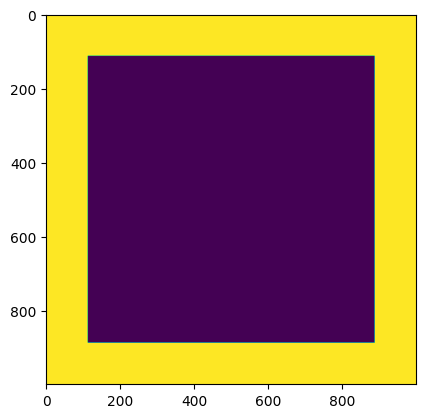

In [15]:
plt.imshow(mask);

📝 Create a wordcloud and barplot

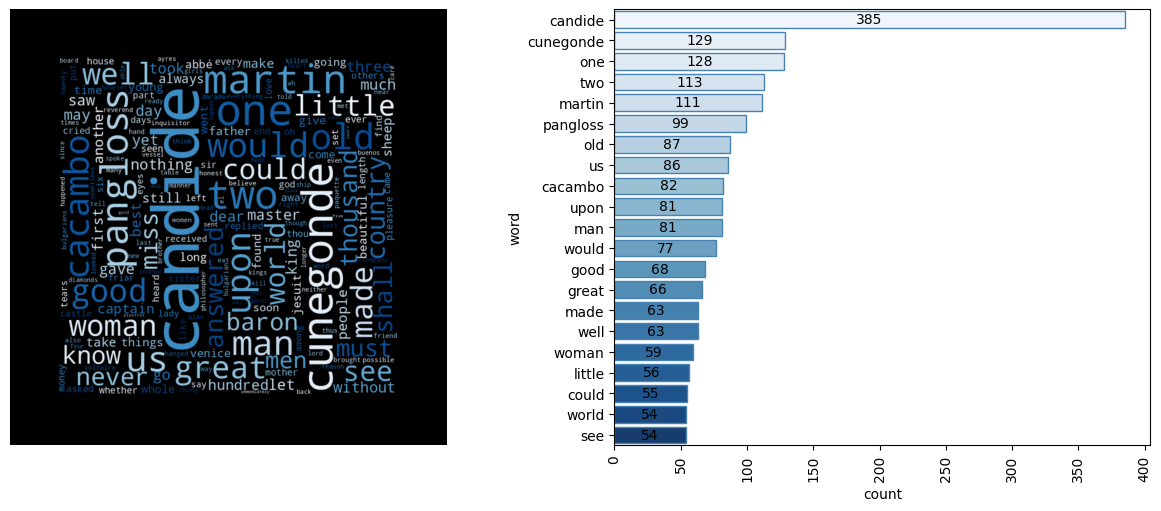

In [16]:
fig, axs = plt.subplots(1,2,figsize=(12,5), constrained_layout=True)
wordcloud = WordCloud(mask=mask, background_color="black", colormap = "Blues").generate_from_frequencies(dict_tok_text)
axs[0].imshow(wordcloud, interpolation="bilinear")
axs[0].axis("off")

sns.barplot(df_candide.query("count>50"), y="word", x="count", palette="Blues", edgecolor ="steelblue")
plt.xticks(rotation=90, size=10)
for i in axs[1].containers:
        axs[1].bar_label(i, label_type='center')
plt.savefig("../raw_data/candide_wc.jpg");

📝 Count the occurency of old woman in the text

In [17]:
text.count("old woman")

47